In [9]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(ggplot2)
library(dplyr)

options(repr.matrix.max.rows=6)

In [10]:
data <- read_csv('players (1).csv')
data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [11]:
na_count <- colSums(is.na(data))
na_count
               

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

In [12]:
mean <- data|>
    summarise(
        mean_played_hours = mean(played_hours, na.rm=TRUE),
        mean_age= mean(Age, na.rm=TRUE))

mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


In [13]:
clean_data <-na.omit(data)
colSums(is.na(clean_data))
clean_data

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           0

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [14]:
clean_data$ 
    subscribe <- as.factor(clean_data$subscribe)
clean_data$
    experience <- as.factor(clean_data$experience)
clean_data$
    gender <- as.factor(clean_data$gender)

clean_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


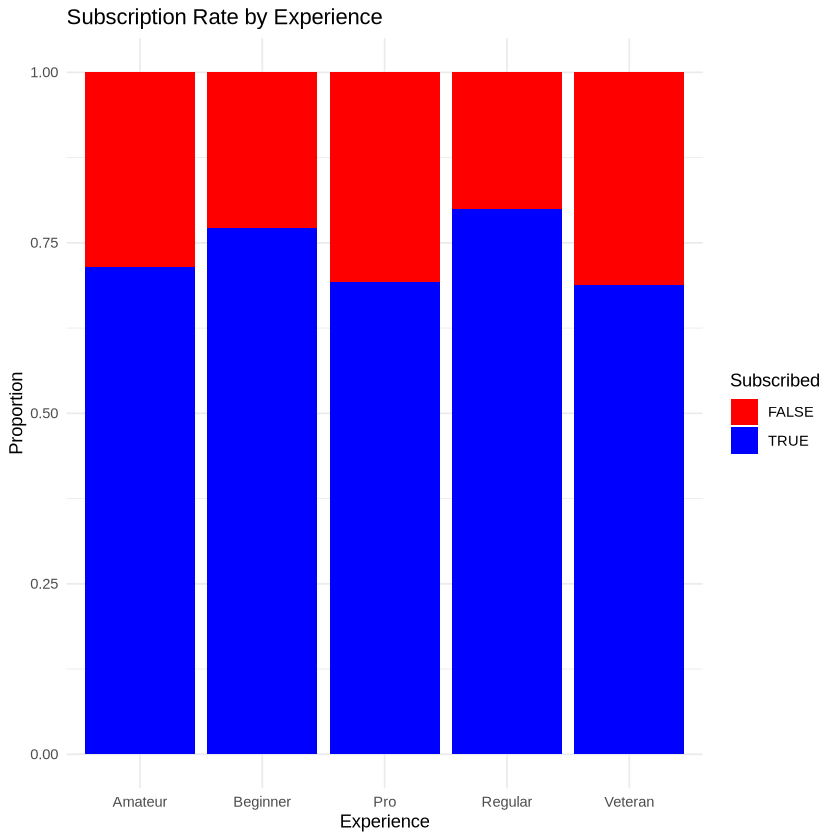

In [15]:
ggplot(clean_data,aes(x=experience, fill=subscribe))+
    geom_bar(position="fill")+
    labs(title="Subscription Rate by Experience", y= "Proportion", x="Experience")+
    scale_fill_manual(values= c("red", "blue"), name= "Subscribed")+
    theme_minimal()

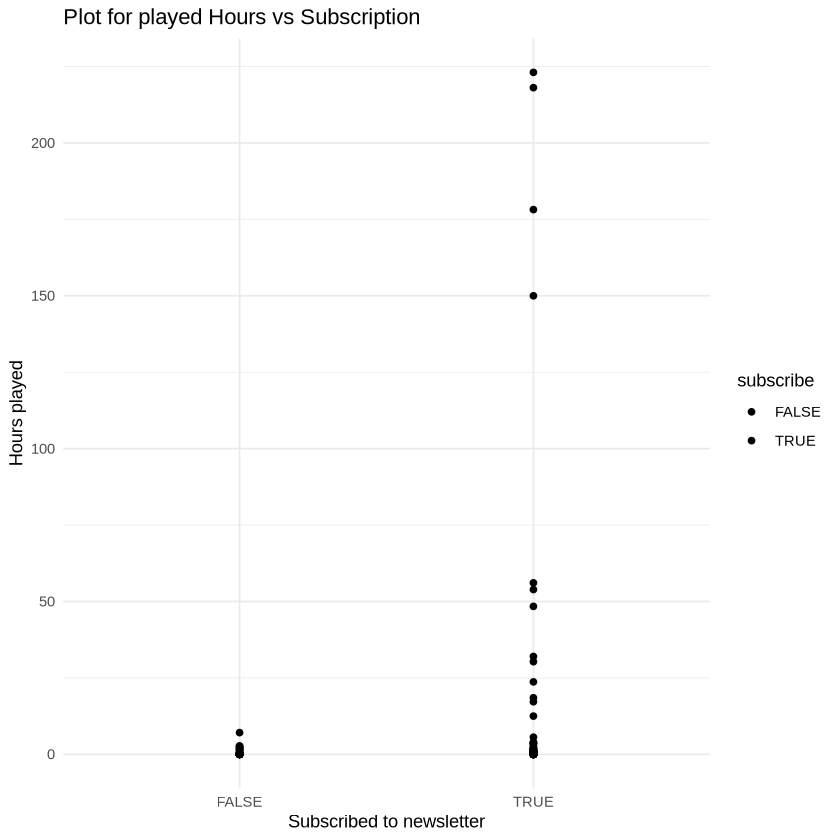

In [16]:
ggplot(clean_data, aes(x= subscribe, y= played_hours, fill=subscribe))+
    geom_point()+
    labs(x= "Subscribed to newsletter", y="Hours played")+
    ggtitle("Plot for played Hours vs Subscription")+
    theme_minimal()
    

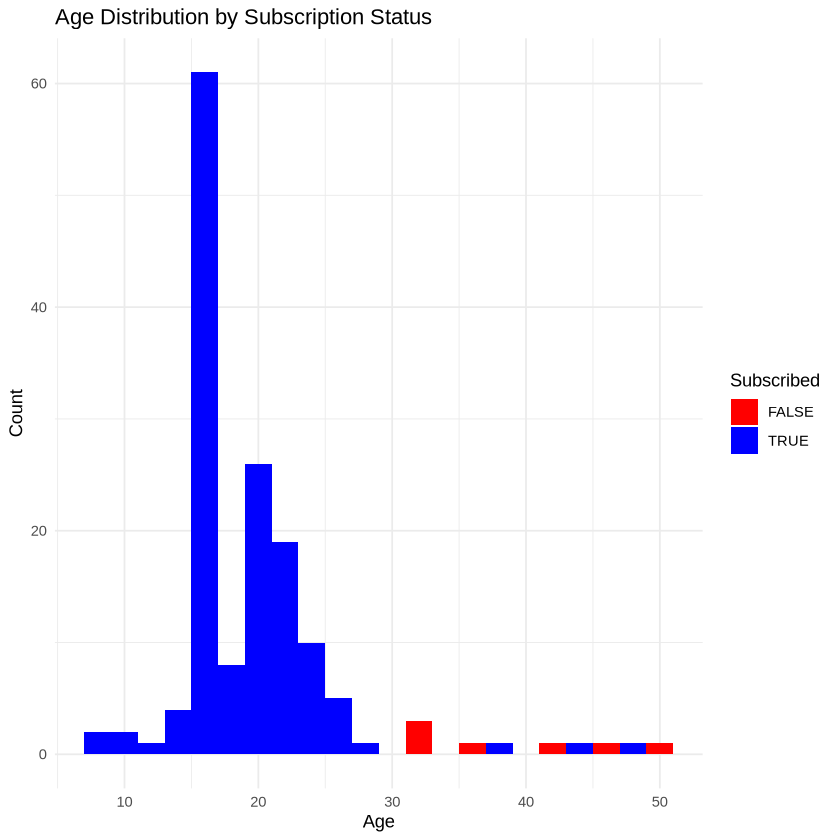

In [17]:
ggplot(clean_data, aes(x=Age, fill =subscribe))+
    geom_histogram(binwidth=2, alpha=1, position= "identity")+
    labs(title= "Age Distribution by Subscription Status", x="Age", y= "Count")+
    scale_fill_manual(values=c("red", "blue"), name= "Subscribed")+
    theme_minimal()

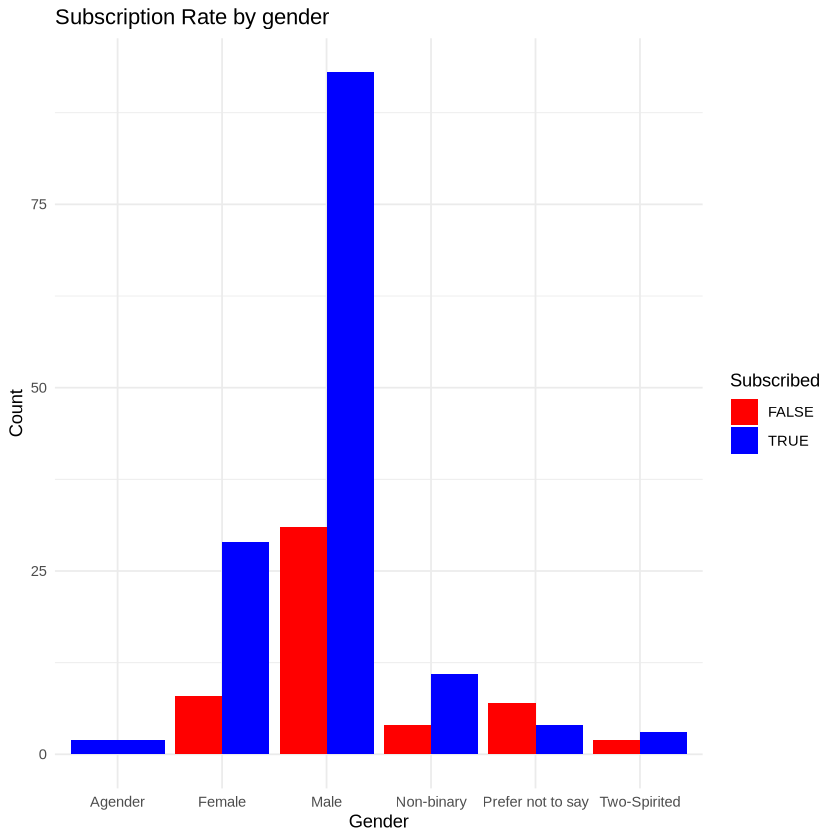

In [18]:
ggplot(clean_data, aes(x=gender, fill=subscribe))+
    geom_bar(position="dodge")+
    labs(title="Subscription Rate by gender", y= "Count", x="Gender")+
    scale_fill_manual(values=c("red", "blue"), name="Subscribed")+
    theme_minimal()

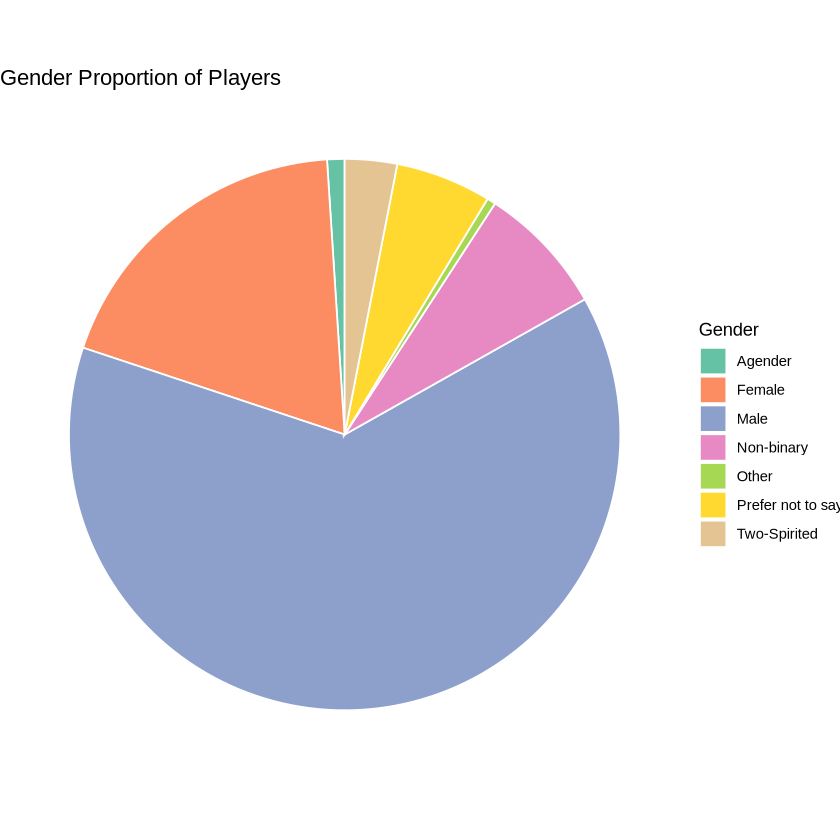

In [19]:
gender_counts <- data|>
    group_by(gender)|>
    summarise(count=n())

ggplot(gender_counts, aes(x="", y= count, fill=gender))+
    geom_col(width=1, color="white")+
    coord_polar(theta="y", start=0)+
    labs(title="Gender Proportion of Players", fill="Gender")+
    theme_void()+
    scale_fill_brewer(palette="Set2")

In [20]:

# Convert categorical variables
clean_data <- clean_data |>
  filter(subscribe %in% c(TRUE, FALSE)) |>
  mutate(
    subscribe = as.numeric(subscribe),
    experience = factor(experience),
    gender = factor(gender)
  )
#changing T/F values from 1,2 to 0 1
clean_data <- clean_data |>
  mutate(
    subscribe = ifelse(subscribe == 2, 0,
                       ifelse(subscribe == 1, 1, NA)),
    experience = factor(experience),
    gender = factor(gender)
  )

clean_data$played_hours_log <- log1p(clean_data$played_hours)

logit_model <- glm(subscribe ~ experience + gender + played_hours + Age, 
                   data = clean_data, 
                   family = binomial)

summary(logit_model)




Call:
glm(formula = subscribe ~ experience + gender + played_hours + 
    Age, family = binomial, data = clean_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)             -17.25767  994.02224  -0.017  0.98615   
experienceBeginner       -0.54751    0.54213  -1.010  0.31253   
experiencePro             0.50291    0.71703   0.701  0.48307   
experienceRegular        -0.50314    0.56647  -0.888  0.37443   
experienceVeteran         0.07707    0.47392   0.163  0.87081   
genderFemale             14.06051  994.02212   0.014  0.98871   
genderMale               14.32355  994.02202   0.014  0.98850   
genderNon-binary         14.43824  994.02216   0.015  0.98841   
genderPrefer not to say  16.00309  994.02223   0.016  0.98716   
genderTwo-Spirited       14.94563  994.02251   0.015  0.98800   
played_hours             -0.11854    0.09165  -1.293  0.19584   
Age                       0.10001    0.03083   3.244  0.00118 **
---
Signif. codes:  0 

In [21]:
clean_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_hours_log
<fct>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Pro,0,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,3.443618
Veteran,0,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,1.568616
Veteran,1,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0.000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,1,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,0.2623643
Amateur,1,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,0.0000000
Amateur,1,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,1.1939225
